In [4]:
#calcular parâmetros das galáxias
#EM CONSTRUÇÃO!
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from astropy.visualization import LogStretch
from matplotlib.colors import LogNorm
from astropy.modeling import models
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import photutils
import time
import statmorph
%matplotlib inline

log_stretch = LogStretch(a=10000.0)

def normalize(image):
    m, M = np.min(image), np.max(image)
    return (image-m) / (M-m)

Filename: teste1011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   (101, 101)   float32   


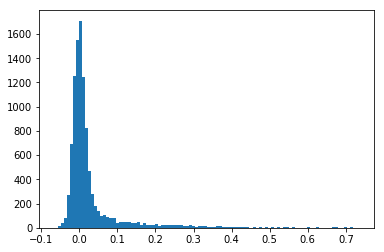

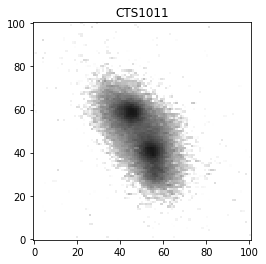

In [2]:
GHII = 'teste1011.fits'
image_star = 'teste1011_psf.fits'
weight= 'weight.fits'

filename = get_pkg_data_filename(GHII)
fits.info(filename)

hdu = fits.open(filename)
#hdu.writeto( 'newtable.fits' )
image_data = hdu[0].data

NBINS = 100
histogram = plt.hist(image_data.flatten(), NBINS)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('CTS1011')
plt.imshow(image_data, origin='lower', cmap='gray_r',norm=LogNorm(vmin=0.025, vmax=1))

[[ 0.00987796  0.00531352 -0.02307709 ...  0.0083697  -0.01696014
  -0.0245892 ]
 [-0.00280657 -0.01108222  0.00093852 ... -0.00721049 -0.00423706
   0.00312054]
 [ 0.04055561  0.01430975 -0.00261748 ... -0.01970562 -0.01550815
  -0.03179112]
 ...
 [ 0.00454132 -0.0024208   0.00388364 ...  0.00039189  0.00067428
  -0.00478792]
 [ 0.0111548  -0.00134851 -0.00139922 ... -0.01419351 -0.01671468
   0.00937346]
 [-0.02343672 -0.0256815  -0.00386712 ...  0.00780034  0.0180956
  -0.02850544]]


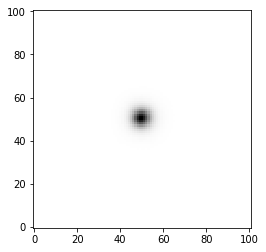

In [3]:
#Estrela PSF
psf = fits.open(image_star)
psf = psf[0].data
plt.imshow(psf, origin='lower', cmap='gray_r')
print(psf) #Matriz estrela

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


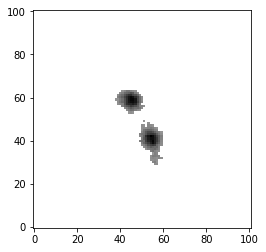

In [5]:
#mapa pixels - weight maps
m_pixel = fits.open(weight)
m_pixel = m_pixel[0].data
plt.imshow(m_pixel, origin='lower', cmap='gray_r')
print(m_pixel) #Matriz mapa de pixel da galáxia

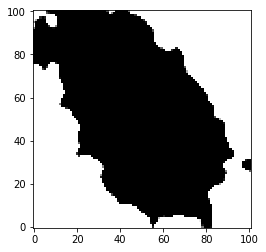

In [6]:
#convolução = Matriz de entrada e matriz de pesos
image_data = ndi.convolve(image_data,weights=psf) #usando a origem ,origin=[204,204] da erro
plt.imshow(image_data, origin='lower', cmap='gray_r',norm=LogNorm(vmin=0.025, vmax=1))

In [7]:
#O SExtractor é indicado para fazer o mapa de segmentação. Segmap
#Porém estou usando photutils para fazer um.
threshold = photutils.detect_threshold(image_data, snr=1.5)
npixels = 5  # minimum number of connected pixels
segm = photutils.detect_sources(image_data, threshold, npixels)

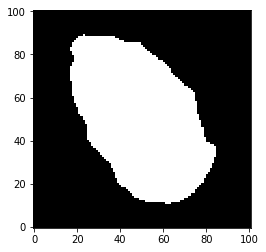

In [8]:
# Keep only the largest segment
label = np.argmax(segm.areas) + 1
segmap = segm.data == label
plt.imshow(segmap, origin='lower', cmap='gray')

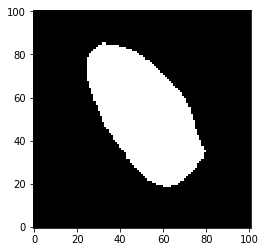

In [12]:
segmap_float = ndi.uniform_filter(np.float64(segmap), size=10)
segmap = segmap_float > 0.99
plt.imshow(segmap, origin='lower', cmap='gray')

In [13]:
#Agora que temos todos os dados necessários
Gain=1000.0 #Assumindo que existe uma média de mil elétrons / pixel no raio efetivo - gain=Gain
m_pixel #Ou Pode ser substituido(Gain) por uma matriz 2D weightmap=m_pixel, fornecida pelo SExtractor
start = time.time()
source_morphs = statmorph.source_morphology(image_data, segmap, weightmap=m_pixel, psf=psf, eta=0.2)
print('Time: %g s.' % (time.time() - start))

/home/JackS/anaconda3/lib/python3.7/site-packages/statmorph/statmorph.py:1319: RuntimeWarning: divide by zero encountered in true_divide
  snp = np.mean(pixelvals / weightmap[locs])


Finished processing source 1.

Time: 0.976401 s.


In [14]:
morph = source_morphs[0]
print('xc_centroid =', morph.xc_centroid)
print('yc_centroid =', morph.yc_centroid)
print('ellipticity_centroid =', morph.ellipticity_centroid)
print('elongation_centroid =', morph.elongation_centroid)
print('orientation_centroid =', morph.orientation_centroid)
print('xc_asymmetry =', morph.xc_asymmetry)
print('yc_asymmetry =', morph.yc_asymmetry)
print('ellipticity_asymmetry =', morph.ellipticity_asymmetry)
print('elongation_asymmetry =', morph.elongation_asymmetry)
print('orientation_asymmetry =', morph.orientation_asymmetry)
print('rpetro_circ =', morph.rpetro_circ)
print('rpetro_ellip =', morph.rpetro_ellip)
print('rhalf_circ =', morph.rhalf_circ)
print('rhalf_ellip =', morph.rhalf_ellip)
print('r20 =', morph.r20)
print('r50 =', morph.r50)
print('r80 =', morph.r80)
print('Gini =', morph.gini)
print('M20 =', morph.m20)
print('F(G, M20) =', morph.gini_m20_bulge)
print('S(G, M20) =', morph.gini_m20_merger)
print('sn_per_pixel =', morph.sn_per_pixel)
print('C =', morph.concentration)
print('A =', morph.asymmetry)
print('S =', morph.smoothness)
print('sersic_amplitude =', morph.sersic_amplitude)
print('sersic_rhalf =', morph.sersic_rhalf)
print('sersic_n =', morph.sersic_n)
print('sersic_xc =', morph.sersic_xc)
print('sersic_yc =', morph.sersic_yc)
print('sersic_ellip =', morph.sersic_ellip)
print('sersic_theta =', morph.sersic_theta)
print('sky_mean =', morph.sky_mean)
print('sky_median =', morph.sky_median)
print('sky_sigma =', morph.sky_sigma)
print('flag =', morph.flag)
print('flag_sersic =', morph.flag_sersic)
print('r50 em arcseg =',morph.r50*0.161)
print('Retorna o eixo semi-principal da elipse mínima =',morph.rmax_ellip)
print('O eixo semi-principal de uma abertura elíptica contendo 50% da luz =',morph.rhalf_ellip) 

xc_centroid = 50.01735094922868
yc_centroid = 49.4282973105589
ellipticity_centroid = 0.5034917252006972
elongation_centroid = 2.014065123897919
orientation_centroid = -1.0220148932586737
xc_asymmetry = 49.333512673261865
yc_asymmetry = 49.57803055674124
ellipticity_asymmetry = 0.5025462306054604
elongation_asymmetry = 2.010237054223389
orientation_asymmetry = -1.020463071489821
rpetro_circ = 28.913574949776226
rpetro_ellip = 38.197121702344695
rhalf_circ = 14.075214856436148
rhalf_ellip = 18.875150320095123
r20 = 8.52431463072778
r50 = 14.436216764497523
r80 = 22.252782820196057
Gini = 0.42604871096172603
M20 = -1.078984742228959
F(G, M20) = -1.103322454374788
S(G, M20) = -0.05519065531771655
sn_per_pixel = -99.0
C = 2.083624291598557
A = 0.10140734171244391
S = 0.015984315495986577
sersic_amplitude = 1464.5198268164818
sersic_rhalf = 18.875150320095123
sersic_n = 1.0
sersic_xc = 49.333512673261865
sersic_yc = 49.57803055674124
sersic_ellip = 0.5025462306054604
sersic_theta = 2.121129

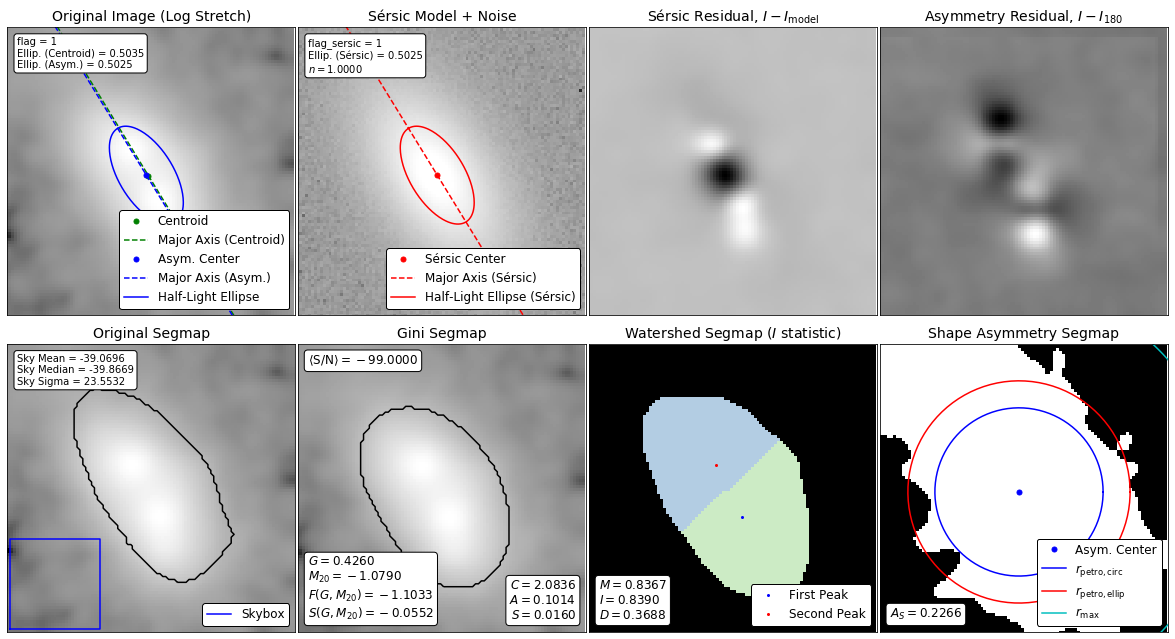

In [15]:
from statmorph.utils.image_diagnostics import make_figure
fig = make_figure(morph)
fig.savefig(GHII+'_morph.png', dpi=150)